In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./crime.csv', encoding='ISO-8859-1')
df.head()

,incident_id,offense_id,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT
0,2017421909,2017421909299900,2999,0,criminal-mischief-other,public-disorder,6/25/2017 8:40:00 PM,NaN,6/27/2017 7:01:00 PM,2920 W 32ND AVE,3133773.0,1702660.0,-105.024167,39.761646,1,113,highland,1,0,1
1,2017342682,2017342682299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:00:00 PM,NaN,5/26/2017 11:04:00 PM,13400 E ALBROOK DR,3185904.0,1709037.0,-104.838576,39.778256,5,521,montbello,1,0,1
2,2017421829,2017421829299900,2999,0,criminal-mischief-other,public-disorder,6/27/2017 4:40:00 PM,NaN,6/27/2017 5:50:00 PM,1600 BLOCK 16TH ST,3140436.0,1699005.0,-105.000538,39.751514,6,612,union-station,1,0,1
3,2017342681,2017342681299900,2999,0,criminal-mischief-other,public-disorder,5/26/2017 7:01:00 PM,NaN,5/26/2017 10:21:00 PM,2200 BLOCK MARKET ST,3143338.0,1700561.0,-104.990186,39.755741,6,612,five-points,1,0,1
4,2017448789,2017448789299900,2999,0,criminal-mischief-other,public-disorder,7/7/2017 9:48:00 PM,NaN,7/7/2017 9:48:00 PM,1733 N GROVE ST,3132994.0,1696487.0,-105.027052,39.744711,1,121,west-colfax,1,0,1


In [3]:
df['DISTRICT_ID'].value_counts()

6    89386
3    84422
1    61308
2    54834
4    49953
5    43682
7     6162
U      752
J        2
9        1
D        1
Name: DISTRICT_ID, dtype: int64

In [4]:
df['PRECINCT_ID'].unique()

array([113, 521, 612, 121, 123, 221, 611, 423, 512, 212, 312, 622, 412,
       313, 323, 211, 111, 422, 623, 322, 314, 321, 421, 223, 311, 522,
       324, 122, 621, 511, 411, 523, 112, 222, 759, 213, 999, 513, 436,
       426, 316, 119, 131, 524, 559, 263, 601, 749, 614, 514, 515, 317,
       215, 332, 613, 532])

In [47]:
# Convert the Date column to a datetime dtype
df['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(df['FIRST_OCCURRENCE_DATE'])

In [44]:
districts = ['1', '2', '3', '4', '5', '6', '7']
data = []

In [45]:
for dist in districts:
    df_selected = df[df['DISTRICT_ID'] == dist]
    hour_groups = df_selected.groupby(df_selected['FIRST_OCCURRENCE_DATE'].dt.hour).size()
    for hour, num_crimes in hour_groups.items():
        date_groups = df_selected[df_selected['FIRST_OCCURRENCE_DATE'].dt.hour == hour].groupby(df_selected['FIRST_OCCURRENCE_DATE'].dt.date).size()
        for date, num_crimes_by_date in date_groups.items():
            date_hour = pd.to_datetime(str(date) + ' ' + str(hour) + ':00:00')
            data.append([date_hour, num_crimes_by_date, dist])


In [46]:
# Create and store in CSV

# Name of CSV crimes_num.csv

import csv

# open a file in write mode
with open('crimes_num_1.csv', 'w', newline='') as csvfile:
    # create a csv writer object
    writer = csv.writer(csvfile)
    writer.writerow(['TimeStamp', 'Count', 'District'])

    # write the data to the file
    for row in data:
        writer.writerow(row)

# # convert list to DataFrame
# df_data = pd.DataFrame({'col': data})

# # write DataFrame to CSV file without index
# df_data.to_csv('crimes_num.csv', index=False)

print('Data written to file successfully.')

Data written to file successfully.


In [219]:
df_whole = pd.read_csv('crimes_num.csv')
df_whole = df_whole.sort_values(by=['Count'])
df_whole


,Hours,Count
1082,2,6
1130,2,8
1058,2,8
1034,2,8
1035,3,9
...,...,...
984,0,917
880,16,1015
928,16,1049
952,16,1112


In [220]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [221]:
# Create an instance of the KMeans class
kmeans = KMeans(n_clusters=5, random_state=0)



In [222]:
# Fit the model to the data
df_counts = df_whole['Count'].to_numpy().reshape(-1, 1)
kmeans.fit(df_counts)
kmeans


KMeans(n_clusters=5, random_state=0)

In [223]:
# Get the cluster labels and centroids
labels = kmeans.predict(df_counts)
centroids = kmeans.cluster_centers_
centroids


array([[372.36      ],
       [ 53.43062201],
       [720.99173554],
       [511.16022099],
       [217.44126984]])

In [134]:
# # Get the cluster labels and centroids
# # labels = kmeans.labels_
# centroids = kmeans.cluster_centers_
# print("Cluster centers:", centroids)



Cluster centers: [[509.64864865]
 [ 51.04433498]
 [369.37078652]
 [213.38906752]
 [720.99173554]]


In [85]:
# Add the labels to the DataFrame
# df_counts['cluster'] = labels



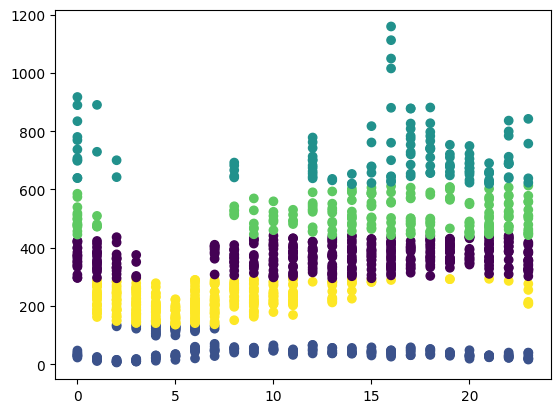

In [224]:
plt.scatter(df_whole['Hours'], df_whole['Count'], c=labels)
# plt.scatter(centroids[:, 0], np.zeros(5), marker='*', s=200, c='#050505')
plt.show()

In [225]:
import pickle
# save the model to a file using pickle
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [226]:
import joblib

# Load the saved model from the file
model = joblib.load('kmeans.pkl')

In [234]:
# Predict cluster labels for the new data
import numpy as np
new_data = np.array([375])
new_data = new_data.reshape(-1, 1)
new_labels = model.predict(new_data)
new_labels

array([0], dtype=int32)